# **Loan Approval Prediction Using K-Nearest Neighbors (KNN) Classifier**



This project involves the application of a K-Nearest Neighbors (KNN) classifier to predict loan approval status. Using a dataset of historical loan application information, the KNN classifier is trained to make predictions on new loan applications. By analyzing the characteristics of previous loan approvals and denials, the model aims to provide predictions for future loan applicants, helping financial institutions make informed lending decisions.

## **Importing the Libraries**

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

## **Data Loading**




In [69]:
#Load the dataset to pandas DataFrame from 'Loan_Status_Prediction_Dataset.csv'.
loan_df = pd.read_csv('Loan_Status_Prediction_Dataset.csv')

In [70]:
#Print the first 5 rows of the dataframe.
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## **Data Preprocessing**

In [71]:
#Provide a summary of the DataFrame's information, including data types and non-null counts. Helps to understand the dataset's structure.
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [72]:
#Provide the dimensions (number of rows and columns) of the 'loan_df' DataFrame to understand the size of the dataset.
loan_df.shape

(614, 13)

In [73]:
#Generate descriptive statistics for the DataFrame to summarize the data
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [74]:
#Identify and count the number of missing (null) values in each column of the DataFrame. It is crucial for data preprocessing and handling missing data.
loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In this data preprocessing step, all rows containing missing values are removed from the dataset. I initially tried to fill in null values in the dataset by replacing null values in categorical columns with mode and in numerical columns with the mean or median. This led to a reduction in model accuracy. As a result, I chose to remove the rows with null values to maintain the model's performance.


In [75]:
loan_df = loan_df.dropna()

In [76]:
loan_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [77]:
#Calculate and return the count of duplicate rows in the DataFrame. It is important for identifying and handling duplicated data entries in the dataset.
#This dataset doesn't have any duplicated data.
loan_df.duplicated().sum()

0

In [78]:
#Count the number of occurrences of each unique value in the 'Dependents' column.
loan_df['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [79]:
#Replaces the value '3+' with 4 in the 'Dependents' column of the DataFrame, ensuring consistency in the data representation.
loan_df = loan_df.replace(to_replace='3+', value=4)

loan_df['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

Replaces the categorical values 'N' and 'Y' in the 'Loan_Status' column with numerical values 0 and 1, which is crucial for converting the target variable into a format suitable for KNN model, enabling loan status prediction.

In [80]:
loan_df.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [81]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


## **Data Visualization**

In [82]:
#Define the custom color palette
custom_palette = ["orange", "skyblue"]
sns.set_palette(custom_palette)

Creates a count plot to visualize the relationship between 'Loan_Status' and 'Education' in the DataFrame 'loan_df,' which is important for understanding how the approval of loans relates to the educational background of applicants. It provides an idea about the impact of education on loan approval. The 'Education' variable is on the x-axis, and 'Loan_Status' is represented by different colors (hue).

Text(0.5, 1.0, 'Relationship Between Loan Status and Education')

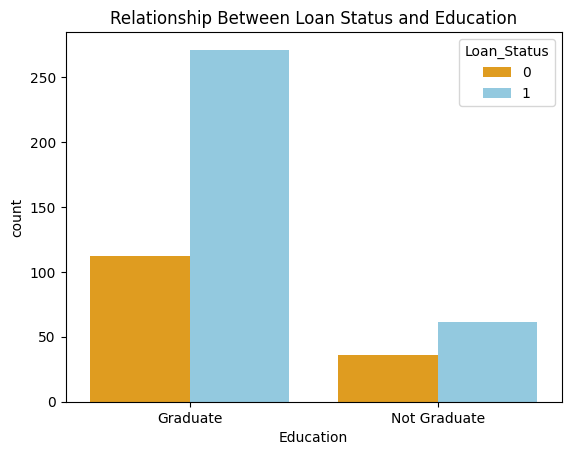

In [83]:
plot = sns.countplot(x='Education', hue='Loan_Status', data=loan_df)
plot.set_title('Relationship Between Loan Status and Education')

Text(0.5, 1.0, 'Relationship Between Loan Status and Marital Status')

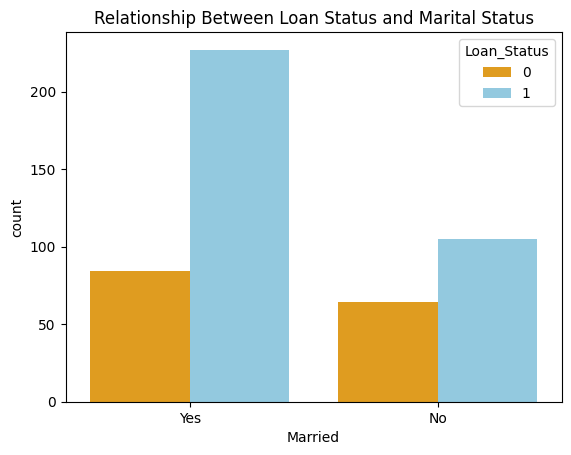

In [84]:
#Create a count plot to visualize the distribution of Loan_Status based on Marital Status.
#The 'Married' variable is on the x-axis, and 'Loan_Status' is represented by different colors (hue).
plot = sns.countplot(x='Married',hue='Loan_Status',data=loan_df)
plot.set_title('Relationship Between Loan Status and Marital Status')

Text(0.5, 1.0, 'Relationship Between Loan Status and Self Employment status')

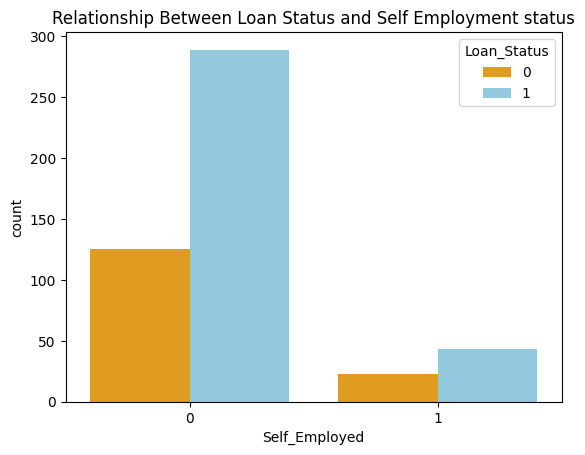

In [100]:
#Create a count plot to visualize the distribution of Loan_Status based on Self-Employment status.
#The 'Self_Employed' variable is on the x-axis, and 'Loan_Status' is represented by different colors (hue).
plot = sns.countplot(x='Self_Employed', hue='Loan_Status', data=loan_df)
plot.set_title('Relationship Between Loan Status and Self Employment status')

Text(0.5, 1.0, 'Relationship Between Loan Status and Property Area')

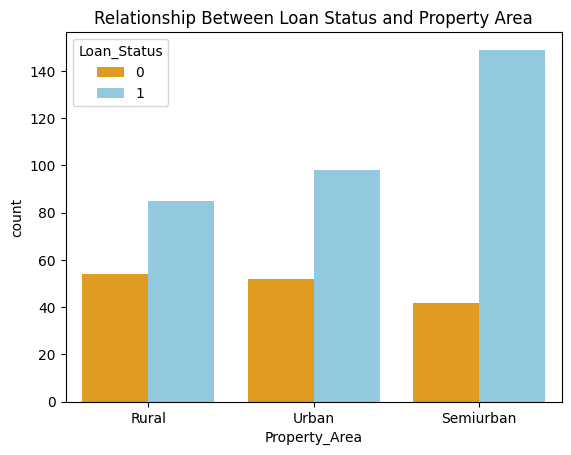

In [86]:
#Create a count plot to visualize the distribution of Loan_Status based on Property Area.
#The 'Property Area' variable is on the x-axis, and 'Loan_Status' is represented by different colors (hue).
plot = sns.countplot(x='Property_Area', hue='Loan_Status', data=loan_df)
plot.set_title('Relationship Between Loan Status and Property Area')

Text(0.5, 1.0, 'Relationship Between Loan Status and Dependents')

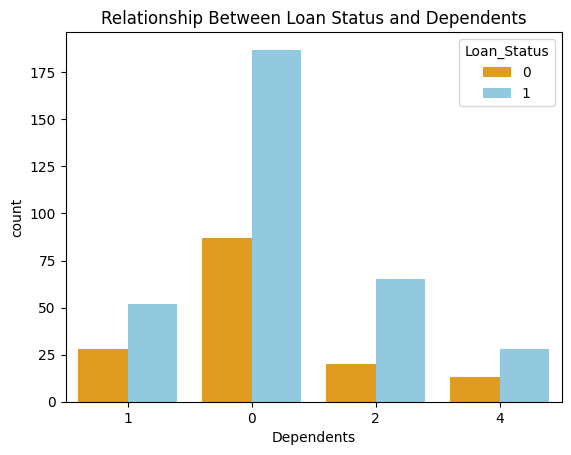

In [87]:
# Create a count plot to visualize the distribution of Loan_Status based on Dependents
# The 'Dependents' variable is on the x-axis, and 'Loan_Status' is represented by different colors (hue)
plot = sns.countplot(x='Dependents', hue='Loan_Status', data=loan_df)
plot.set_title('Relationship Between Loan Status and Dependents')

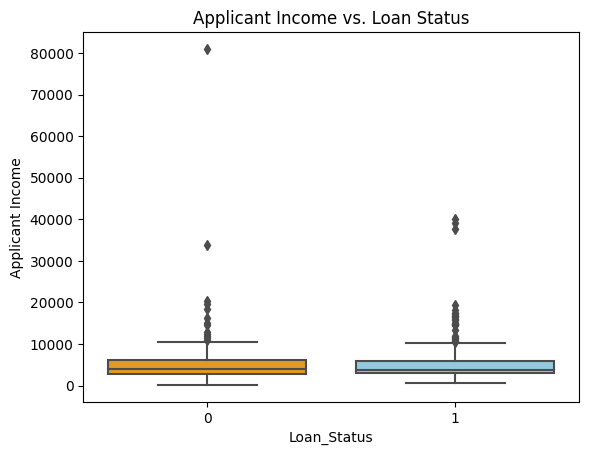

In [88]:
# Create a box plot to visualize the distribution of Applicant Income by Loan_Status
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=loan_df)

# Add labels and a title
plt.xlabel('Loan_Status')
plt.ylabel('Applicant Income')
plt.title('Applicant Income vs. Loan Status')

# Show the plot
plt.show()

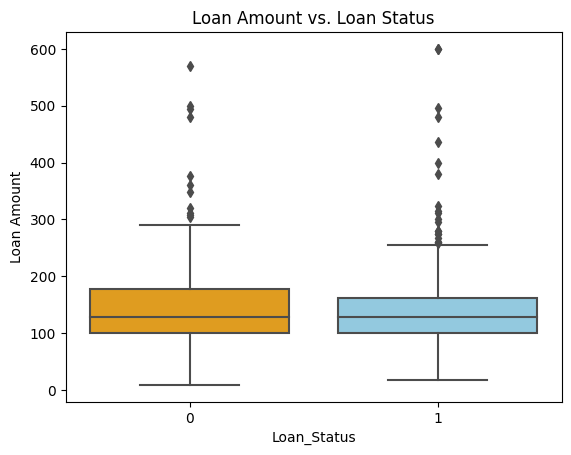

In [89]:
# Create a box plot to visualize the distribution of Loan Amount by Loan_Status
sns.boxplot(x='Loan_Status', y='LoanAmount', data=loan_df)

# Add labels and a title
plt.xlabel('Loan_Status')
plt.ylabel('Loan Amount')
plt.title('Loan Amount vs. Loan Status')

# Show the plot
plt.show()

## **Replacing Categorical Values with Numerical Labels in the DataFrame**

This code replaces categorical values in multiple columns of 'loan_df' with corresponding numerical labels, making the data suitable for KNN  model that require numeric inputs and ensuring that the dataset can be used effectively for loan status prediction.

In [90]:
loan_df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [91]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


## **Correlation Matrix**

This code calculates and visualizes the correlation matrix for the features in the 'loan_df' DataFrame. The correlation matrix is essential because it provides an idea about how each pair of features is related to one another. This information is crucial for various data analysis tasks such as Feature Selection. It helps to identify highly correlated features, allowing us to choose the most relevant ones for modeling.
  

<ipython-input-92-ae87510ce96b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = loan_df.corr()


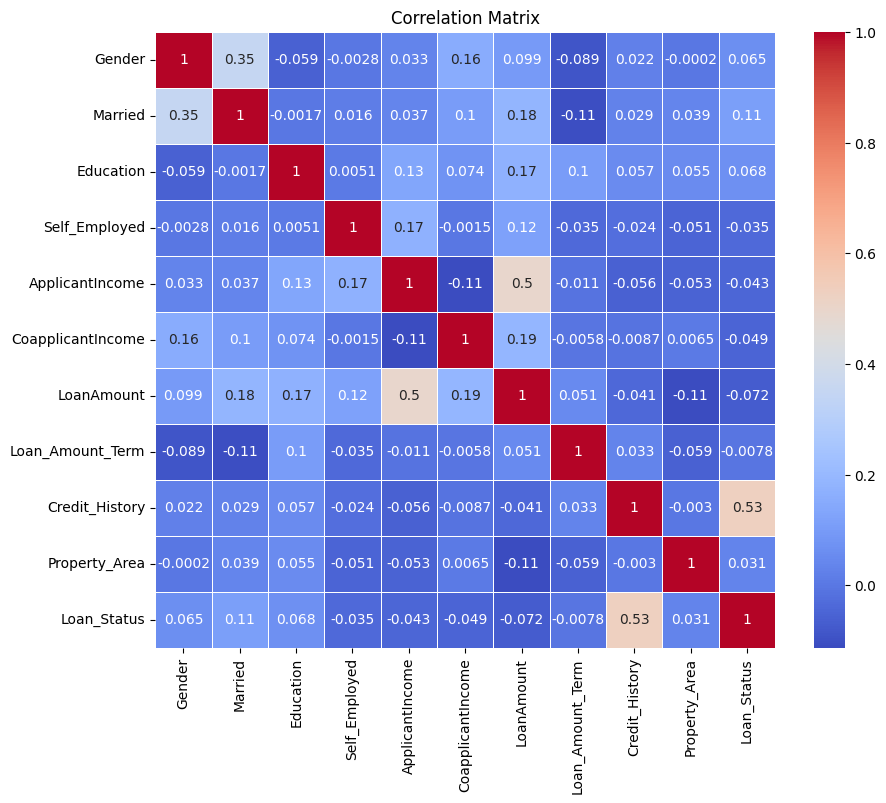

In [92]:
# Calculate the correlation matrix for the features in the 'loan_df' DataFrame
correlation_matrix = loan_df.corr()

# Create a figure for the heatmap with a specified size
plt.figure(figsize=(10, 8))

# Create a heatmap using the 'correlation_matrix' data
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Add a title to the heatmap for better interpretation
plt.title('Correlation Matrix')

# Display the heatmap
plt.show()

## **Data and Label Separation in the Loan Data**

This code segregates the dataset into features and target variable, which is essential for supervised machine learning, allowing models to learn from features to predict the target variable.

In [93]:
# Separate the data and label
X = loan_df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_df['Loan_Status']

## **Splitting the Dataset into Training and Testing Sets**

This code partitions the dataset into training and testing subsets, using 10% of the data for testing while maintaining the class balance in the 'Loan_Status' variable.

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=2)

In [95]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


## **Hyperparameter Tuning for KNN Classifier**

This code segment is essential for hyperparameter tuning using grid search for a K-Nearest Neighbors classifier. It defines a grid of hyperparameters, such as the number of neighbors (k) and distance metrics (Euclidean and Manhattan) to search over. It then creates a KNN classifier, a grid search object with cross-validation and accuracy scoring, fits the grid search to the training data, and identifies the best hyperparameters and KNN model, optimizing the model's performance.

In [101]:
# Define a grid of hyperparameters to search over
param_grid = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],  # Values of k to search
    'metric': ['euclidean', 'manhattan'],  # Distance metrics to try
}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Create a grid search object with cross-validation (cv=5) and scoring method (accuracy)
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best KNN model
best_knn_model = grid_search.best_estimator_

## **Training the model**


In [102]:
model = best_knn_model

# Fit (train) the KNN model on the training dataset using the best hyperparameters
model.fit(X_train, y_train)


KNeighborsClassifier(metric='manhattan', n_neighbors=9)

## **Model Evaluation**

This code is crucial for evaluating the performance of the model. It uses the model to predict labels on the test dataset and then calculates accuracy and generates a classification report containing various metrics like precision, recall, and F1-score, which provide an idea about the model's predictive quality and performance on the test data. This information helps assess the model's effectiveness and suitability for the task.

In [103]:
# Predict the labels on the test set
y_pred = model.predict(X_test)

# Calculate accuracy and other classification metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


Accuracy: 0.7083333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.20      0.30        15
           1       0.72      0.94      0.82        33

    accuracy                           0.71        48
   macro avg       0.66      0.57      0.56        48
weighted avg       0.68      0.71      0.65        48



## **Loan Approval Prediction System for Input Data**

In [104]:
# Input data for prediction
input_data = {
    'Gender': ['Female'],
    'Married': ['Yes'],
    'Dependents': 2,
    'Education': ['Graduate'],
    'Self_Employed': ['No'],
    'ApplicantIncome': 5000,
    'CoapplicantIncome': 2000,
    'LoanAmount': 150,
    'Loan_Amount_Term': 360,
    'Credit_History': 1,
    'Property_Area': ['Urban']
}

def preprocess_data(data):
    data.fillna(0, inplace=True)  # Replace missing values with 0
    data = data.replace(to_replace='3+', value=4)  # Replace '3+' with 4 in the 'Dependents' column
    data.replace({'Married': {'No': 0, 'Yes': 1}, 'Gender': {'Male': 1, 'Female': 0}, 'Self_Employed': {'No': 0, 'Yes': 1},
                  'Property_Area': {'Rural': 0, 'Semiurban': 1, 'Urban': 2}, 'Education': {'Graduate': 1, 'Not Graduate': 0}}, inplace=True)
    return data

# Convert the input data into a pandas DataFrame
input_df = pd.DataFrame(input_data)

input_df = preprocess_data(input_df)

# Make a prediction for the input data
loan_status_prediction = model.predict(input_df)

if loan_status_prediction[0] == 1:
    print("Loan status: Approved")
else:
    print("Loan status: Not Approved")

Loan status: Approved
